# Convolutional classifier

**Load dataset**

In [4]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed(42)

In [6]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', 
      labelsize='large', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

In [7]:
ds_train = image_dataset_from_directory(
    '../input/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

ds_valid = image_dataset_from_directory(
    '../input/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.


I0000 00:00:1765296045.973403      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765296045.974028      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 5051 files belonging to 2 classes.


In [8]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = (
    ds_train
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

ds_valid = (
    ds_valid
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

**Definr pre-trained base**

In [10]:
pretrained_base = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(128, 128, 3) # Change strictly to match your image size
)
pretrained_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [14]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=1,
)

Epoch 1/30


I0000 00:00:1765296061.412642     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - binary_accuracy: 0.6007 - loss: 0.7102 - val_binary_accuracy: 0.6801 - val_loss: 0.5611
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - binary_accuracy: 0.7477 - loss: 0.5490 - val_binary_accuracy: 0.7325 - val_loss: 0.5264
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - binary_accuracy: 0.7968 - loss: 0.5073 - val_binary_accuracy: 0.7634 - val_loss: 0.5026
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - binary_accuracy: 0.8291 - loss: 0.4760 - val_binary_accuracy: 0.7884 - val_loss: 0.4795
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - binary_accuracy: 0.8482 - loss: 0.4468 - val_binary_accuracy: 0.8040 - val_loss: 0.4641
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - binary_accuracy: 0.8605 - loss: 0.4227 - val_binary_accuracy: 0.8155 - val_loss: 0.4514
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - binary_accuracy: 0.8748 - loss: 0.4009 - val_binary_accuracy: 0.8285 - val_loss: 0.4351
Epoch 8/30

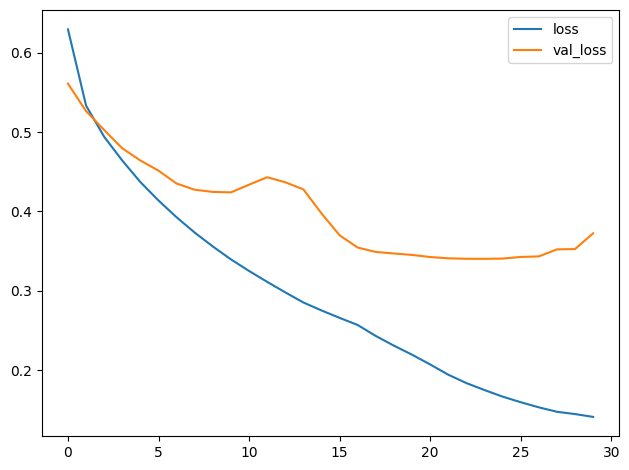

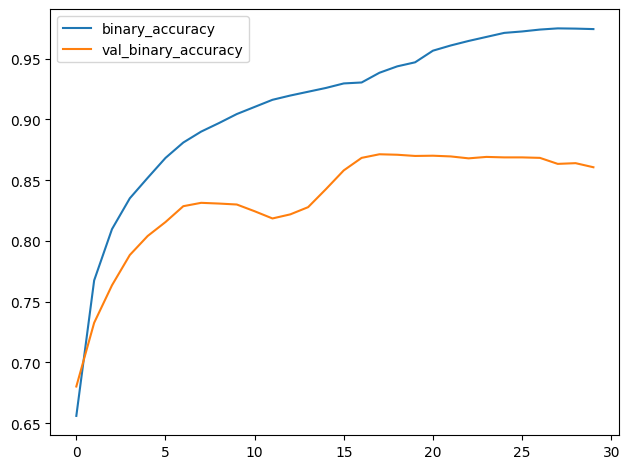

In [15]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();